In [ ]:
import jupyter_fix

jupyter_fix.fix_jupyter_path()

In [306]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use('grayscale')

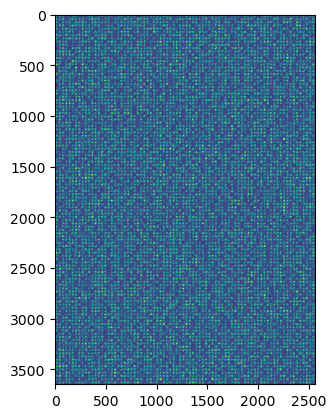

In [307]:
emnist_sheet = cv2.imread("empty_sheet_emnist.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(emnist_sheet)

In [308]:
emnist_sheet = emnist_sheet // 255
emnist_sheet

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [309]:
x, y = emnist_sheet.shape

print(x, y, x/32, y/32, x//32 * y//32)

3648 2560 114.0 80.0 9120


1024


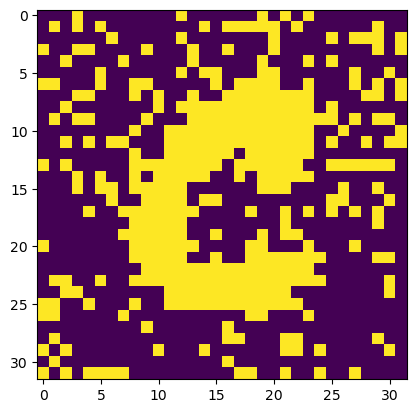

In [310]:
plt.imshow(emnist_sheet[0:32, 0:32])
print(len(emnist_sheet[0:32, 0:32].flatten()))

In [311]:
letters = np.zeros(shape=(x//32 * y//32, 32*32))

counter = 0

for i in range(0, x, 32):
    for j in range(0, y, 32):
        letters[counter] = emnist_sheet[i:i+32, j:j+32].flatten()
        counter += 1

In [312]:
letters

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [313]:
import re

with open('data/winnie_the_pooh/pg67098.txt', 'r') as file:
    data = file.read()
### Process text to only contain letters, numbers and whitespaces

pattern = re.compile('^[a-zA-Z0-9 ]*$')

result = re.sub(' +', ' ', "".join([s for s in data if pattern.match(s)]).replace('\n', ' ')[5985:])

result_ascii = [ord(c) for c in result][:9120]
# result_ascii = [c - min(result_ascii) for c in result_ascii]

C


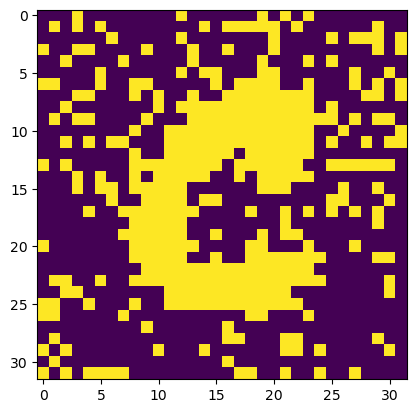

In [314]:
val = 0
print(result[val])
plt.imshow(letters[val].reshape(32, 32))

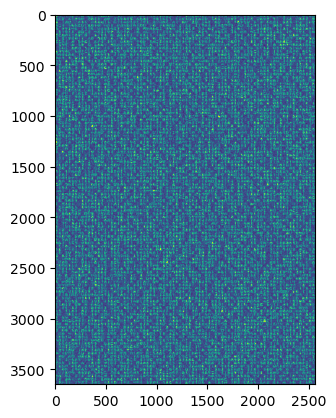

In [315]:
kuzu_sheet = cv2.imread("empty_sheet_kuzushiji.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(kuzu_sheet)

In [316]:
kuzus = np.zeros(shape=(x//32 * y//32, 32*32))

counter = 0

for i in range(0, x, 32):
    for j in range(0, y, 32):
        kuzus[counter] = kuzu_sheet[i:i+32, j:j+32].flatten()
        counter += 1

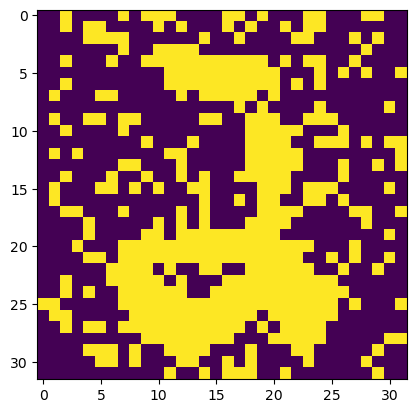

In [317]:
plt.imshow(kuzus[0].reshape((32, 32)))

In [318]:
import umap

In [319]:
reducer_emnist = umap.UMAP(random_state=42)

In [320]:
embedding_emnist = reducer_emnist.fit_transform(letters)

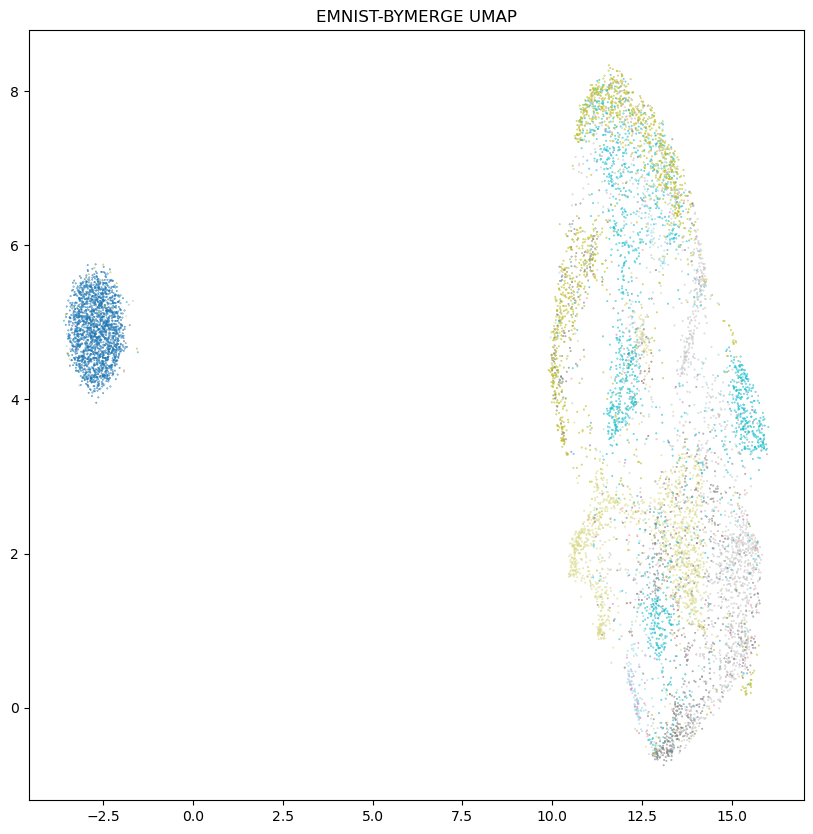

In [321]:
plt.figure(figsize=(10, 10))
plt.title("EMNIST-BYMERGE UMAP")
sct = plt.scatter(embedding_emnist[:, 0], embedding_emnist[:, 1], c=result_ascii, label=result_ascii, s=0.1, cmap='tab20')
plt.show()

<AxesSubplot:>

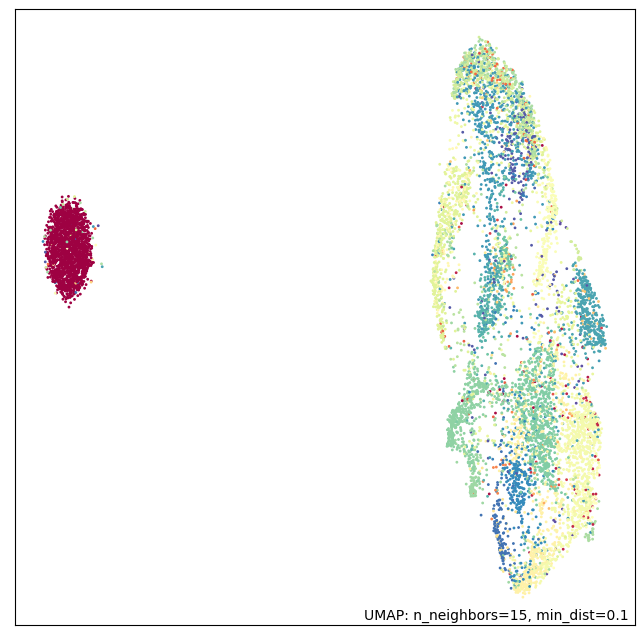

In [322]:
from umap.plot import points

points(reducer_emnist, labels=np.asarray(result_ascii), show_legend=False)

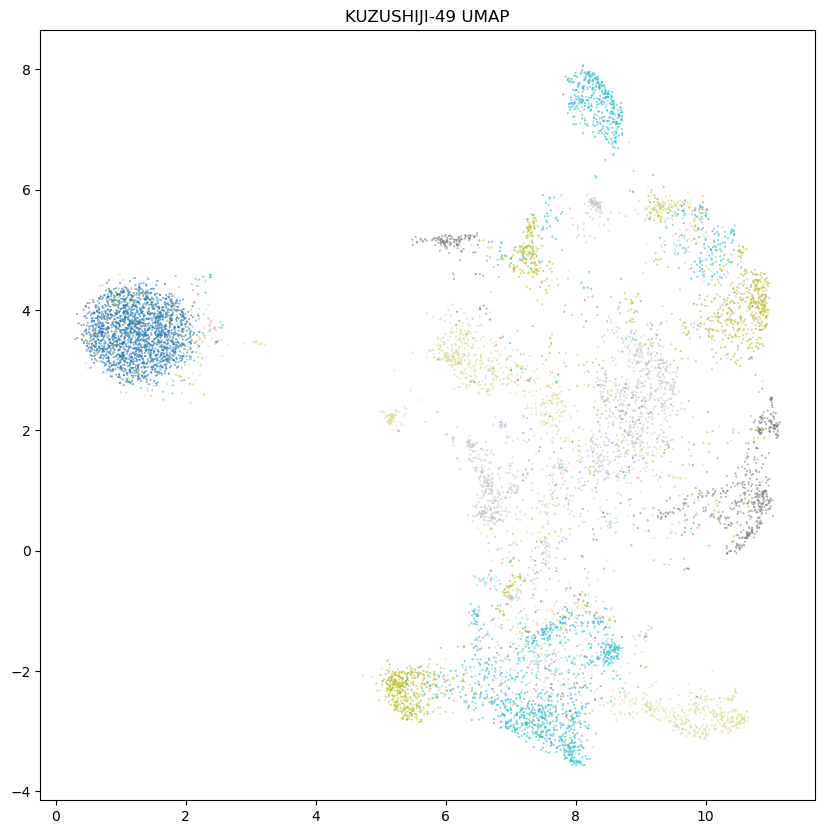

In [323]:
reducer_kuzu = umap.UMAP(random_state=42)
embedding_kuzu = reducer_kuzu.fit_transform(kuzus)
plt.figure(figsize=(10, 10))
plt.title("KUZUSHIJI-49 UMAP")
plt.scatter(embedding_kuzu[:, 0], embedding_kuzu[:, 1], c=result_ascii, s=0.1, cmap='tab20')

<AxesSubplot:>

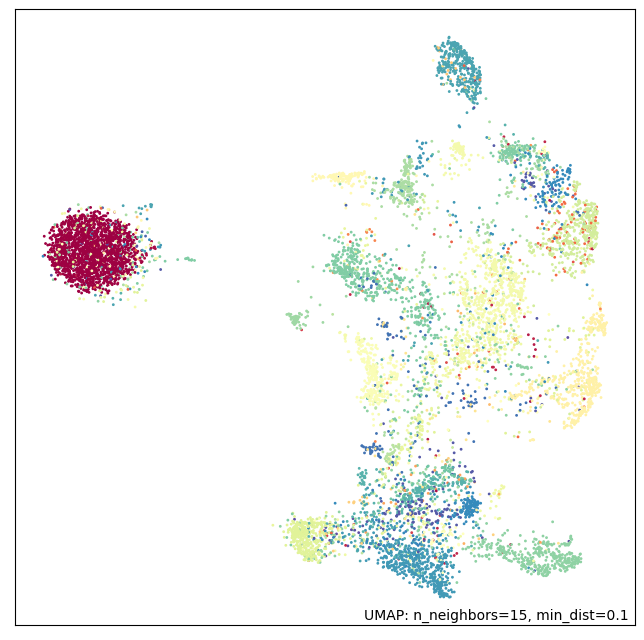

In [324]:
from umap.plot import points

points(reducer_kuzu, labels=np.asarray(result_ascii), show_legend=False)